In [9]:
%run pylib/paper
self = Paper()

# Observation of a new gamma-ray source class

<h5 style="text-align:right; margin-right:15px"> 2023-08-05 11:08</h5>

Read 6699 source entries from `files/fermi_sources_v2.csv`, selected 6496 with criteria 'delta<0.25 & curvature<2.1'

Loaded Fermi 4FGL gll_psc_v32.fit: 7195 entries


In [11]:
def source_table(self):
    all = self.df 
    hcu = all[all['HCU cut']];
    c1 = all.groupby('source type').size(); c1.name='All'
    c2 = hcu.groupby('source type').size(); c2.name='HCU cut'
    t = pd.DataFrame([c1,c2]).reindex(
        columns='MSP young bll fsrq bcu other UNID-PSR UNID-BLL UNID-FSRQ '.split())
    t['Total'] = np.sum(t.to_numpy(), axis=1)
    show(t)
source_table(self)

source type,MSP,young,bll,fsrq,bcu,other,UNID-PSR,UNID-BLL,UNID-FSRQ,Total
All,174,139,1463,790,1556,347,878,838,311,6496
HCU cut,28,32,29,209,267,91,388,84,180,1308


In [29]:
dr4 = self.fermicat; len(dr4)
dr4g = dr4[dr4.r95>0]; len(dr4g)
sum(dr4g.assoc_prob==0)

2371

<Axes: xlabel='significance', ylabel='Count'>

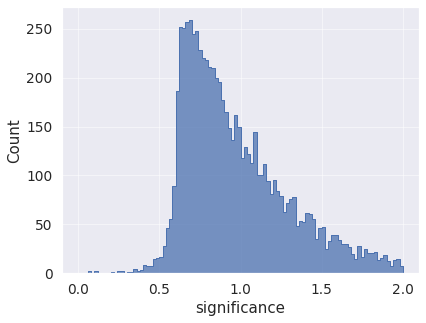

In [22]:
s = dr4.significance; min(s)
sns.histplot(np.log10(s), bins=np.linspace(0,2,101), element='step')

In [ ]:
self.show_d_vs_ep( fignum=1)
self.show_fp_vs_sinb(fignum=2)

### $F_p$ vs. $|\sin(b)|$              
Selecting sources above the black line in Figure 99,
results in 354 HCU sources. In Figure 100 we see 
the resulting distribution in peak flux $F_p$ vs. $|\sin(b)|$ for known
pulsars and HCU candidates.

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bc74b22c0>
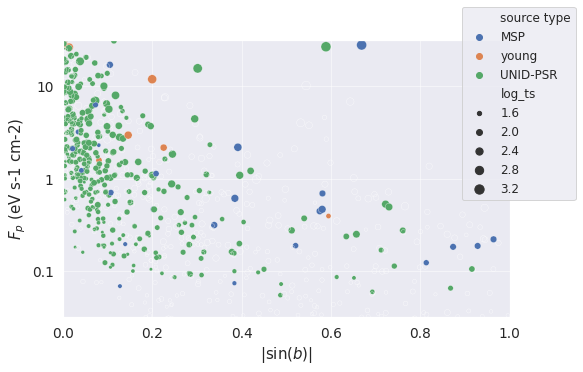

In [34]:
def fp_vs_sinb(self, fignum=2, cut='HCU cut',  hue_order='MSP young UNID-PSR'.split()):
    
    df = self.df if cut is None else self.df[self.df[cut]]

    hue_kw = dict(hue='source type', hue_order=hue_order)
    size_kw =dict(size='log_ts', sizes=(10,100))
    fig, ax = plt.subplots(figsize=(8,5))

    sns.scatterplot(df, ax=ax, x='abs_sin_b', y='log_fpeak', 
                    **hue_kw,**size_kw)
    ax.set(xlim=(0,1.), ylim=(-1.5,1.5), ylabel='$F_p$ (eV s-1 cm-2)',
        yticks=[-1,0,1], yticklabels='0.1 1 10'.split(),
        xlabel= r'$|\sin(b)|$')
    plt.legend(fontsize=12, loc='lower left', bbox_to_anchor=(0.88,0.4));
    return fig
    
def show_fp_vs_sinb(self, fignum=100, cut='HCU cut', hue_order='MSP young UNID-PSR'.split()):
    
    hcu = self.df[self.df['HCU cut']]
    hcu_cut=hcu[hcu['source type']=='UNID-PSR']
    show(f""" ### $F_p$ vs. $|\\sin(b)|$              
        Selecting sources above the black line in Figure {fignum-1},
        results in {len(hcu_cut)} HCU sources. In Figure {fignum} we see 
        the resulting distribution in peak flux $F_p$ vs. $|\\sin(b)|$ for known
        pulsars and HCU candidates.
    """)

    fig = fp_vs_sinb(self, fignum, cut, hue_order)
    show(fig, fignum=fignum, caption="""Scatter plot peak flux vs latitude for 
        known pulsars and pulsar-like UNIDS.
    """)
    show("""
        """)

# self.fp_vs_sinb()
show_fp_vs_sinb(self, cut='HCU cut')

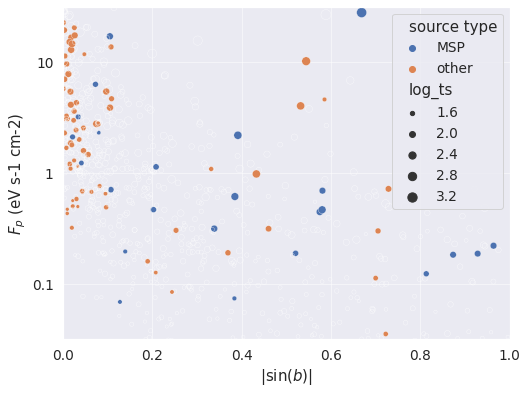

In [3]:
hue_order='MSP other'.split()
# hue_order='UNID-BLL UNID-FSRQ'.split()
hue_kw = dict(hue='source type', hue_order=hue_order)
df = self.df
df_hcu = df[df['HCU cut']]
size_kw =dict(size='log_ts', sizes=(10,100))
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(df_hcu, ax=ax, x='abs_sin_b', y='log_fpeak', 
                **hue_kw,**size_kw)
ax.set(xlim=(0,1.), ylim=(-1.5,1.5), ylabel='$F_p$ (eV s-1 cm-2)',
    yticks=[-1,0,1], yticklabels='0.1 1 10'.split(),
    xlabel= r'$|\sin(b)|$');

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bf85253f0>
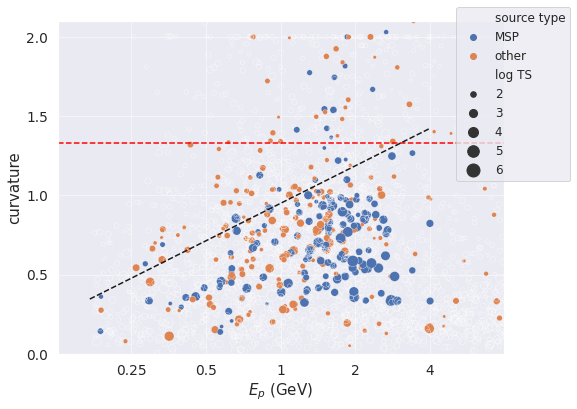

In [4]:
show(self.d_vs_ep('MSP other'.split()));

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bf860af20>
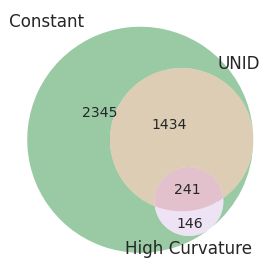

In [6]:
self.show_venn()
# self.stats()

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bca62eec0>
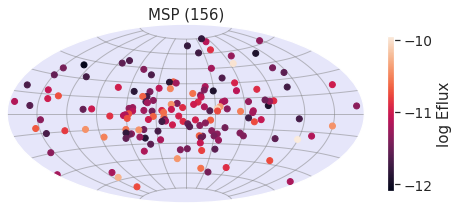

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bca47fd90>
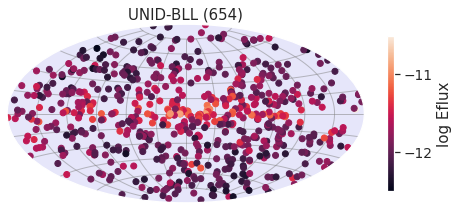

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bca538f40>
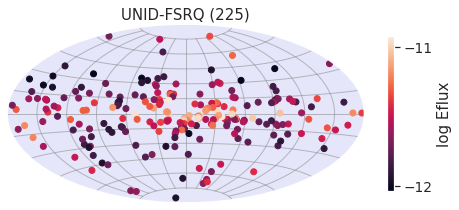

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bca3d2590>
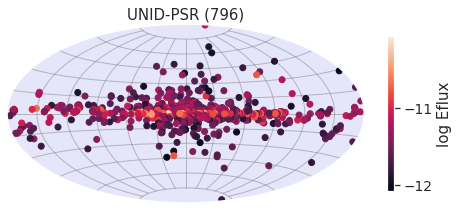

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bca46f640>
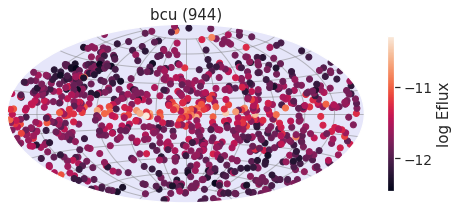

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bca331630>
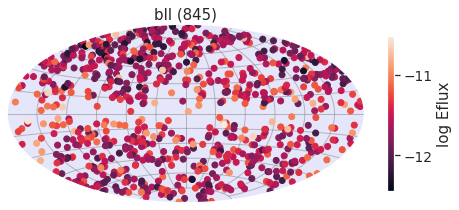

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bca1daa40>
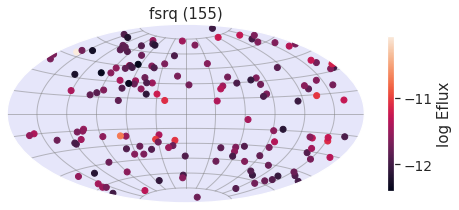

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bca08bb50>
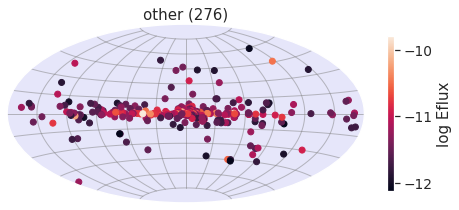

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0bca15b520>
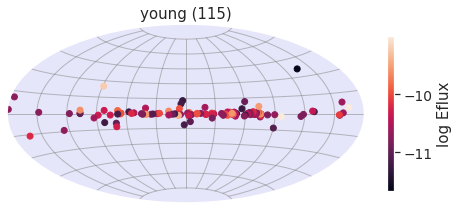

In [11]:
stl = df.groupby('source type').size()
for name, cnt in stl.items():
    xdf = df[df['source type']==name]
    self.show_positions(xdf, figsize=(8,8), title=f'{name} ({cnt})')

(1.3377820743777358, 1.118376079085559, 4.1132503787829275)

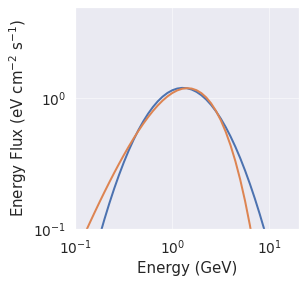

In [79]:
hcu = self.df[self.df['HCU cut']& (self.df.association=='unid')]; len(hcu)
hcu.query('ts>200 & curvature>1 & abs_sin_b>0.1')['ts uw_name'.split()]


sf = self.uwcat.loc['J1656.5-2734'].specfunc
from utilities.spectral_functions import PLSuperExpCutoff
fig,ax = plt.subplots(figsize=(4,4))
plec = PLSuperExpCutoff([8e-12, 0.05, 400, 0.75], e0=1000)
sf.sed_plot(ax=ax)
plec.sed_plot(ax=ax)
ax.set(xlim=(0.1, 20), ylim=(0.1, 5))
2*sf.curvature(), 2*plec.curvature(), np.exp(np.sqrt(2))

In [ ]:
self.show_venn()

In [ ]:
def to_csv(self,dfx, filename = 'files/hcu_candidates.csv'):
    dfx.index.name = '4FGL-DR4'
    dfx.to_csv(filename, float_format='%.3f')
    show(f"""Wrote HCU  sources, sorted by TS, to `{filename}` with {len(dfx)} entries.""")

In [ ]:
def temp():#self.fgl_pulsar_curvature()
    data = self.df.query('-0.5 < log_epeak < 2').copy()
    def srctype(src):
        if src.association in 'bll fsrq'.split(): return 'blazar'
        if src.association =='psr': return 'psr'
        return 'unid'
    data['source_type'] = data.apply(srctype, axis=1)
    fig, ax1= plt.subplots(figsize=(10,6))#None
    assoc = data[np.isin(data.source_type.values, 'blazar psr'.split()) ]
    hue_kw = dict(hue='source_type', hue_order='blazar psr'.split())
    hist_kw = dict(x='curvature', bins = np.linspace(-0.2,2, 42), element='step',
                log_scale=(False, True), kde=True)
    sns.histplot(assoc, ax=ax1 ,  **hue_kw, **hist_kw)
    ax1.set(xlim=(0,2))
    show(fig)
            
    
    show(f"""## What about the BCU's? """)
    fig, ax2= plt.subplots(figsize=(10,4))#None
    sns.histplot(data[data.association=='bcu'], ax=ax2 , **hist_kw,  hue='prediction',);
    
    fig, ax1= plt.subplots(figsize=(6,4))#None
    assoc = data[np.isin(data.association.values, 'bll fsrq bcu'.split()) ]
    hist_kw.update(x='curvature', cumulative=True, kde=False, fill=False)
    sns.ecdfplot(assoc, x='curvature', ax=ax1 ,  hue='association',  ) #*;*hist_kw)
    ax1.set(xlim=(0,2))
    show(f"""### Blazar cumulative curvatures""")
    show(fig)
    
    f = lambda x: - (x-1)**2
    x = np.linspace(-1,3,100)
    fig,ax = plt.subplots(figsize=(3,3))
    ax.plot(x, f(x));
    ax.set(ylim=(-4, 0.5), xlabel=r'log energy ', 
           ylabel=r'log flux', xticks=[], yticks=[]);
    ax.plot(1,0, 'o');
    hw = np.array([0.,2])
    ax.plot(hw, f(hw), '--r',) 


